# The simple model 2
Количественные признаки из датасета 3DSC_MP.csv были заменены на элементные

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('3DSC_MP.csv', header = 1)
data1 = data.loc[data['tc'] < 10.0]
data2 = data1[['formula_sc']]
elements = pd.read_csv('/content/таблица элементов.csv')
elements

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Flerovium,Fl,289.000,175,114,114,7,14.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7,4.0
114,115,Moscovium,Mc,288.000,173,115,115,7,15.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,5.0
115,116,Livermorium,Lv,292.000,176,116,116,7,16.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7,6.0
116,117,Tennessine,Ts,295.000,178,117,117,7,17.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,7.0


In [ ]:
elements.columns

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')

In [ ]:
# Создаю колонки с нужными мне элементарными признаками и добавляю их в мой DataFrame
list_of_elements = [
    'H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S',
    'Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga',
    'Ge','As','Se','Br','Kr','Rb','Sr','Y','Zr','Nb','Mo','Tc','Ru','Rh','Pd',
    'Ag','Cd','In','Sn','Sb','Te','I','Xe','Cs','Ba','La','Ce','Pr','Nd','Pm',
    'Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb','Lu','Hf','Ta','W','Re','Os',
    'Ir','Pt','Au','Hg','Tl','Pb','Bi','Po','At','Rn','Fr','Ra','Ac','Th','Pa',
    'U','Np','Pu','Am','Cm','Bk','Cf','Es','Fm','Md','No','Lr'
]

Avg_atomicwight = np.array([0.0] * len(data2.formula_sc))
Avg_Electronegativity = np.array([0.0] * len(data2.formula_sc))
Avg_AtomicRadius = np.array([0.0] * len(data2.formula_sc))
Avg_MeltingPoint = np.array([0.0] * len(data2.formula_sc))
Avg_NumberofValence = np.array([0.0] * len(data2.formula_sc))
for i in enumerate(data2.formula_sc.iloc):
    s = [0.0] * 5
    k = 0.0
    for j in list_of_elements:
        if j in i[1]:
            k += 1
            s[0] += float(elements.loc[((elements['Symbol'] == j))]['AtomicMass'])
            s[1] += float(elements.loc[((elements['Symbol'] == j))]['Electronegativity'])
            s[2] += float(elements.loc[((elements['Symbol'] == j))]['AtomicRadius'])
            s[3] += float(elements.loc[((elements['Symbol'] == j))]['MeltingPoint'])
            s[4] += float(elements.loc[((elements['Symbol'] == j))]['NumberofValence'])

    Avg_atomicwight[i[0]] = s[0] / k
    Avg_Electronegativity[i[0]] = s[1] / k
    Avg_AtomicRadius[i[0]] = s[2] / k
    Avg_MeltingPoint[i[0]] = s[3] / k
    Avg_NumberofValence[i[0]] = s[4] / k

# Не рассматриваю эти два признака, так как не придумал, что делать с Nan
data2['Avg_atomicwight'] = Avg_atomicwight;
data2['Avg_Electronegativity'] = Avg_Electronegativity;
#data2['Avg_AtomicRadius'] = Avg_AtomicRadius;
data2['Avg_MeltingPoint'] = Avg_MeltingPoint;
#data2['Avg_NumberofValence'] = Avg_NumberofValence;

<ipython-input-107-29b25978de82>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Avg_atomicwight'] = Avg_atomicwight;
<ipython-input-107-29b25978de82>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Avg_Electronegativity'] = Avg_Electronegativity;
<ipython-input-107-29b25978de82>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
data2

,formula_sc,Avg_atomicwight,Avg_Electronegativity,Avg_MeltingPoint
0,Ag0.02Ge2Pd1.98Sr1,72.931167,1.976667,1003.1100
1,Ag0.15Sn0.85Te1,96.560750,2.142500,712.6675
2,Ag0.1Ge2Pd1.9Sr1,72.931167,1.976667,1003.1100
3,Ag0.1In0.9Te1,119.297500,2.117500,693.3775
4,Ag0.2Ba1Si1.8,63.231400,1.868000,1376.2220
...,...,...,...,...
5768,Y1Zn1,77.143000,1.435000,1246.0150
5769,Yb1,130.980000,1.160000,1448.1500
5770,Zn1,65.380000,1.650000,692.8800
5771,Zn2Zr1,78.302000,1.490000,1409.0150


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data2.iloc[:, 1:], data1.iloc[:,7], test_size=0.33, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
predictions1 = lr.predict(X_train)

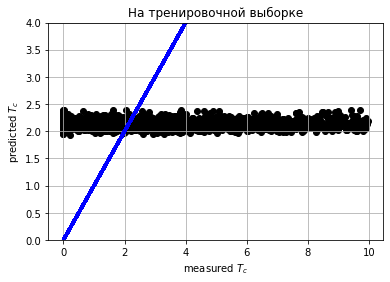

In [ ]:
fig, ax = plt.subplots()
plt.scatter(y_train, predictions1, color = 'black')
plt.plot(y_train, y_train, color = 'blue', linewidth = 3)

ax.grid()

ax.set_xlabel('measured $T_c$')
ax.set_ylabel('predicted $T_c$')
plt.title("На тренировочной выборке")
plt.ylim((0, 4))
plt.show()

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
print('Variance score: %.2f' % r2_score(y_test, predictions))

Mean squared error: 6.66
Variance score: 0.01


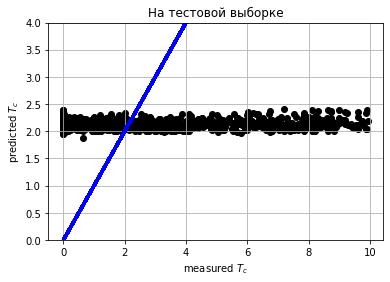

In [ ]:
fig, ax = plt.subplots()
plt.scatter(y_test, predictions, color = 'black')
plt.plot(y_test, y_test, color = 'blue', linewidth = 3)

ax.grid()

ax.set_xlabel('measured $T_c$')
ax.set_ylabel('predicted $T_c$')
plt.title("На тестовой выборке")
plt.ylim((0, 4))
plt.show()